##  Quantum Phase Estimation

Quantum Phase Estimation (QPE) is a crucial algorithm in quantum computing with wide-ranging applications in chemistry, cryptography, and beyond. It allows us to estimate the phase (or eigenvalue) of an eigenvector of a unitary operator. 

QPE is the backbone of many quantum algorithms, such as Shor's algorithm for factoring and algorithms for solving linear systems.

Below is a step-by-step implementation of the Quantum Phase Estimation algorithm using IBM's Qiskit.

In this example, we perform the following steps:

✅ Unitary Definition: We define a unitary operation UUU with a known eigenvalue. Here, we use a phase gate with a phase shift of θ=1/8

✅ Quantum Circuit Creation: We create a quantum circuit with nnn counting qubits and 1 additional qubit for the unitary operation.

✅ Hadamard Gates: We apply Hadamard gates to the counting qubits to create a superposition of states.

✅ Controlled-U Gates: We apply controlled-U gates, which apply the unitary operation conditionally on the state of each counting qubit.

✅ Inverse Quantum Fourier Transform (QFT): We apply the inverse QFT to the counting qubits to extract the phase information.

✅ Measurement: We measure the counting qubits to get the result.

✅ Visualization: We visualize the circuit and the measurement results using Qiskit's plotting tools.

In [52]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [53]:
# Define the unitary operation (in this case, we use a simple gate U)
theta = 1/8
U = QuantumCircuit(1)

The below code  applies a phase gate to the qubit. The phase gate P(λ) is a single-qubit gate that applies a phase shift of λ to the state ∣1⟩.

In this case, the phase shift  λ is given by  2⋅π⋅θ, where θ,= 1/8. Thus the phase shift  2⋅π⋅1/8   =  π /4 

The method `p` is used to apply the phase gate, and the parameters are:

- 2⋅π⋅θ: The phase angle in radians.
- 0: The index of the qubit to which the gate is applied (since we have only one qubit, its index is 0).

In [54]:
# U is the phase gate
U.p(2 * np.pi * theta, 0)  

##### Explanation of the code above
The code above  applies a phase gate to the qubit. The phase gate P(λ) is a single-qubit gate that applies a phase shift of λ to the state ∣1⟩.

In this case, the phase shift  λ is given by  2⋅π⋅θ, where θ,= 1/8. Thus the phase shift  2⋅π⋅1/8   =  π /4 

The method `p` is used to apply the phase gate, and the parameters are:

- 2⋅π⋅θ: The phase angle in radians.
- 0: The index of the qubit to which the gate is applied (since we have only one qubit, its index is 0).

Below is further explanation of phase gate.

In [55]:
from IPython.display import display, Math

print("Phase Gate : P(λ)): The phase gate is a single-qubit rotation about the Z-axis of the Bloch sphere. The matrix representation of the phase gate is:")
# Display the matrix representation of the phase gate
display(Math(r'P(\lambda) = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\lambda} \end{pmatrix}'))
print("In this case, 𝜆 = 𝜋 /4 , so the matrix becomes: ")
display(Math(r'P\left(\frac{\pi}{4}\right) = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}'))

Phase Gate : P(λ)): The phase gate is a single-qubit rotation about the Z-axis of the Bloch sphere. The matrix representation of the phase gate is:


<IPython.core.display.Math object>

In this case, 𝜆 = 𝜋 /4 , so the matrix becomes: 


<IPython.core.display.Math object>

In [56]:
# Number of qubits for the QPE
n = 3  # Number of counting qubits

# Create the quantum phase estimation circuit
qc = QuantumCircuit(n + 1, n)

In [57]:
# Apply Hadamard gates to the counting qubits
for qubit in range(n): # This loop iterates over each qubit in the range from 0 to n-1.then applies Hadamard gates
    qc.h(qubit)

`U.to_gate()` below  converts the phase gate U into a gate object that can be added to the quantum circuit.

`.control(1)` creates a controlled version of the gate U with 1 control qubit.

`[qubit, n]`  specifies the qubits to which the controlled gate is applied. qubit is the target qubit, and n is the control qubit.

Controlled gates are a fundamental concept in quantum computing where an operation is performed on a target qubit only if the control qubit is in a specific state (usually ∣1⟩). The controlled phase gate CU(λ) will apply the phase shift to the target qubit if the control qubit is∣1⟩.

In [58]:
# Apply controlled-U gates
for qubit in range(n): # This loop iterates over each qubit in the range from 0 to n-1 then applies controlled-U gates.
    qc.append(U.to_gate().control(1), [qubit, n]) 

In [59]:
# Apply inverse QFT to the counting qubits
def qft_dagger(circuit, n):
    """Apply the inverse QFT on the first n qubits in the circuit"""
    for qubit in range(n//2):
        circuit.swap(qubit, n-1-qubit)
    for j in range(n):
        for m in range(j):
            circuit.cp(-np.pi/float(2**(j-m)), m, j)
        circuit.h(j)

qft_dagger(qc, n)

In [60]:
# Measure the counting qubits
qc.measure(range(n), range(n))

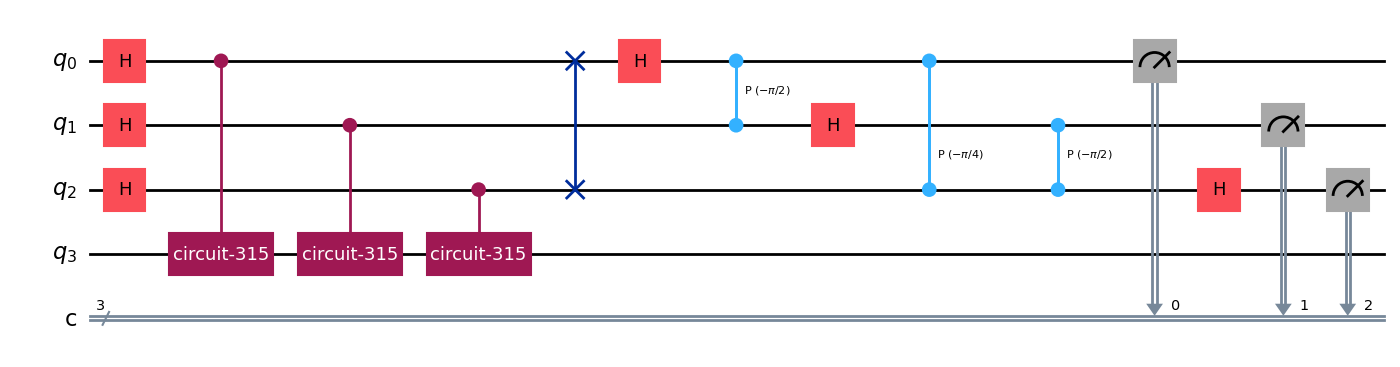

In [61]:
# Draw the circuit
qc.draw('mpl')
plt.show()

In [62]:
# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

In [63]:
# Execute the circuit on the simulator
result = simulator.run(compiled_circuit).result()

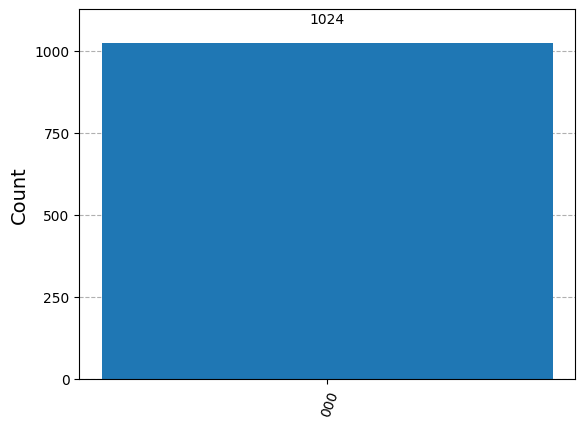

In [64]:
# Get and plot the counts
counts = result.get_counts(qc)
plot_histogram(counts)
plt.show()

Quantum Phase Estimation is a powerful algorithm that forms the basis of many quantum applications. Understanding and implementing QPE can provide deep insights into the potential of quantum computing.